# 图形样式调整

Matplotlib是高度可定制的，但很难知道要调整哪些设置能够得到更具吸引力的图。Seaborn带有许多自定义主题和高级接口，用于控制matplotlib图形的外观。

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

我们定义一个简单函数，该函数绘制了多条具有不同偏移量的正弦曲线，利用该图帮助我们理解可设置的不同样式参数。

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

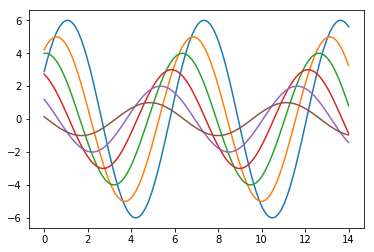

In [3]:
sinplot()

使用set()函数可以切换到seaborn默认风格(注意：seaborn 0.8及以前的版本在引入包时会默认调用set函数。之后的版本需要显示调用)。

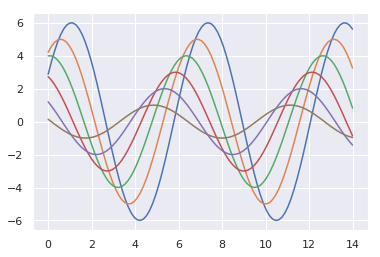

In [4]:
sns.set()
sinplot()

seaborn将matplotlib参数分成了独立的两组：一组用于设置美学样式；另一组用于设置缩放图元素比例以便能够融入不同的上下文环境中。

seaborn中提供了两组接口来控制这些参数：axes_style()和set_style()函数用于设置图形样式；plotting_context()和set_context()函数用于设置图像相关参数。这两对函数中，前者多返回一个字典包含参数及其值，后者使用默认参数。

## seaborn图形样式

seaborn中内置了darkgrid、whitegrid、dark、white和ticks五种主题。适用于不同的应用和个人喜好。默认的主题是darkgrid。带格网的图形方便查看定量数据信息，不带格网的图形可以减少格网线对数据曲线的干扰。

### whitegrid主题

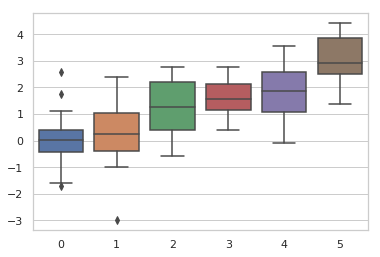

In [5]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

### dark主题

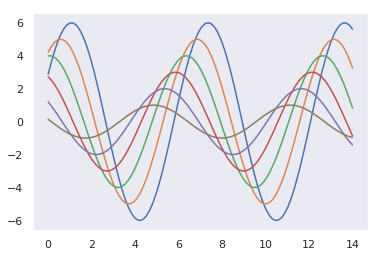

In [6]:
sns.set_style("dark")
sinplot()

### white主题

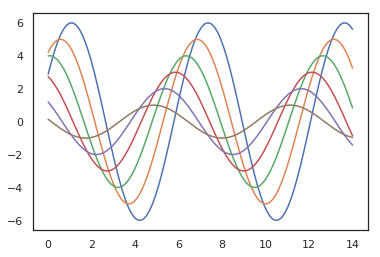

In [7]:
sns.set_style("white")
sinplot()

### ticks主题

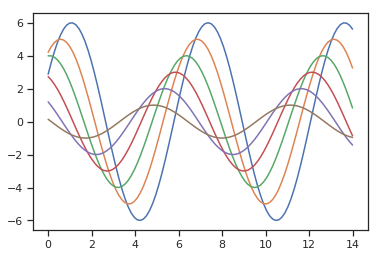

In [8]:
sns.set_style("ticks")
sinplot()

### 删除axes spines

调用despine()可以移除图形右侧和上侧的实线

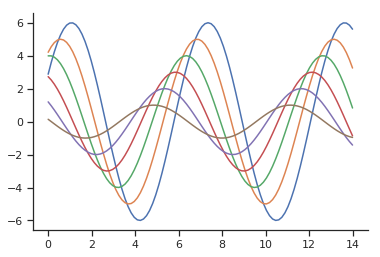

In [10]:
sinplot()
sns.despine()

despine()函数的offset参数可以使坐标轴偏离数据，trim参数用于限制保留下来的坐标轴的范围。

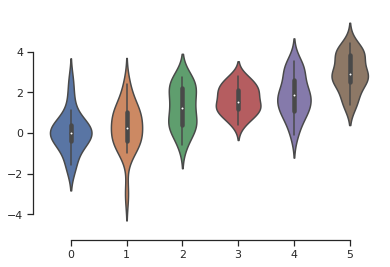

In [11]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True)

可以使用额外的参数控制保留哪个坐标轴。

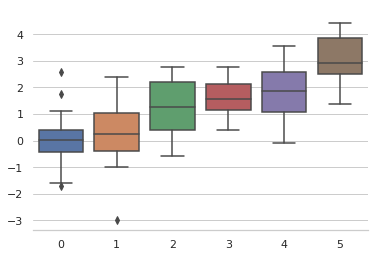

In [12]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

## 临时修改样式

虽然切主题很容易，但在with语句中使用axes_style()可以临时设置绘图参数。

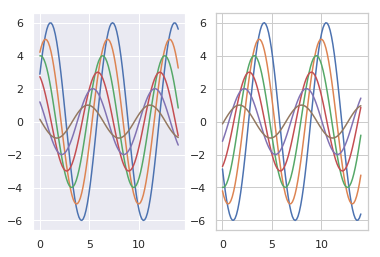

In [13]:
f = plt.figure()
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(1, 2, 1)
    sinplot()
ax = f.add_subplot(1, 2, 2)
sinplot(-1)

## 覆盖seaborn中元素的默认样式

通过将字典类型的参数传递给axes_style()和set_style()函数的rc参数可以修改seaborn的样式。但是通过这两个函数仅可以修改部分样式参数。set()函数可以设置任何matplotlib参数。

如果需要查看所有可以修改的参数，调用不带参数的函数会返回当前所有参数的设置。

In [15]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

通过字典修改相应参数

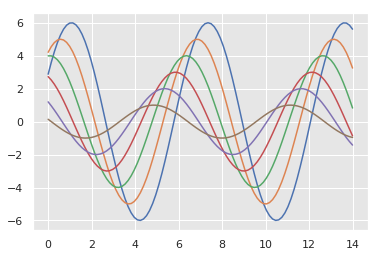

In [16]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

## 图元素比例缩放

seaborn中内置了四种上下文环境：paper、talk、poster和notebook。默认上下文环境是notebook。

In [23]:
sns.set()

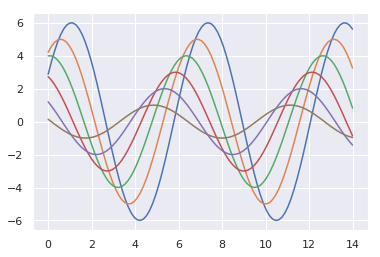

In [24]:
sinplot()

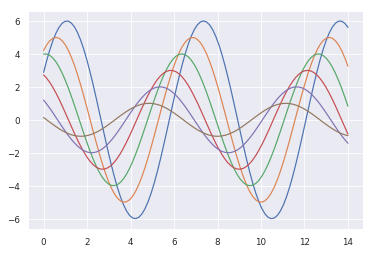

In [19]:
sns.set_context("paper")
sinplot()

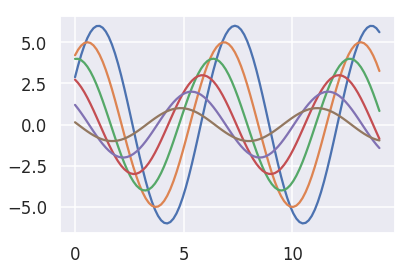

In [20]:
sns.set_context("talk")
sinplot()

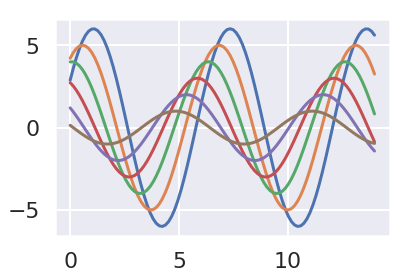

In [21]:
sns.set_context("poster")
sinplot()

图元素的缩放参数设置与图样式参数设置相同，通过字典参数rc来设置。

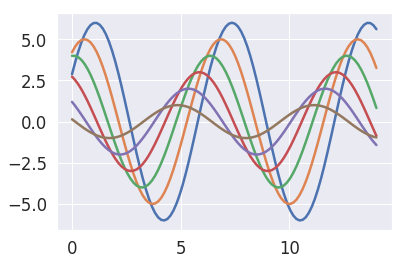

In [22]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()